In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', rc={'figure.figsize':(16, 9)})

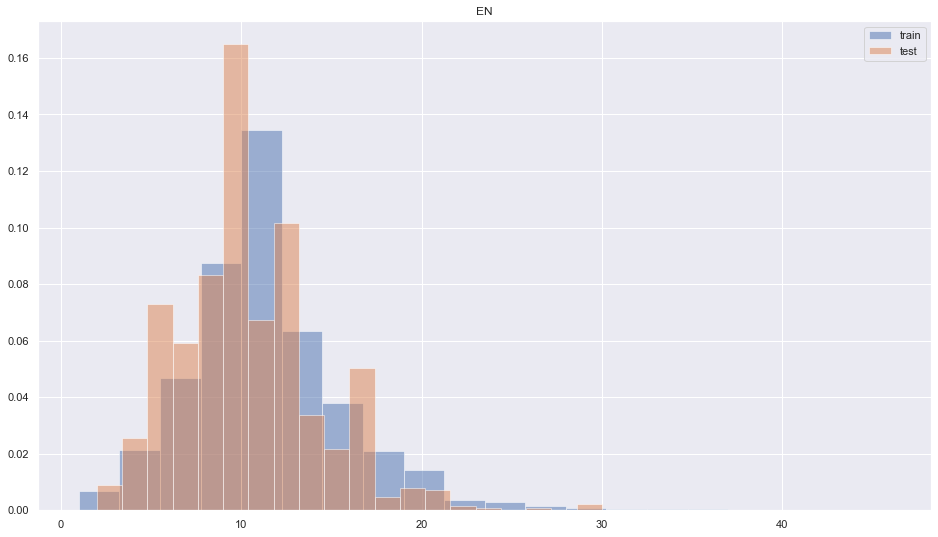

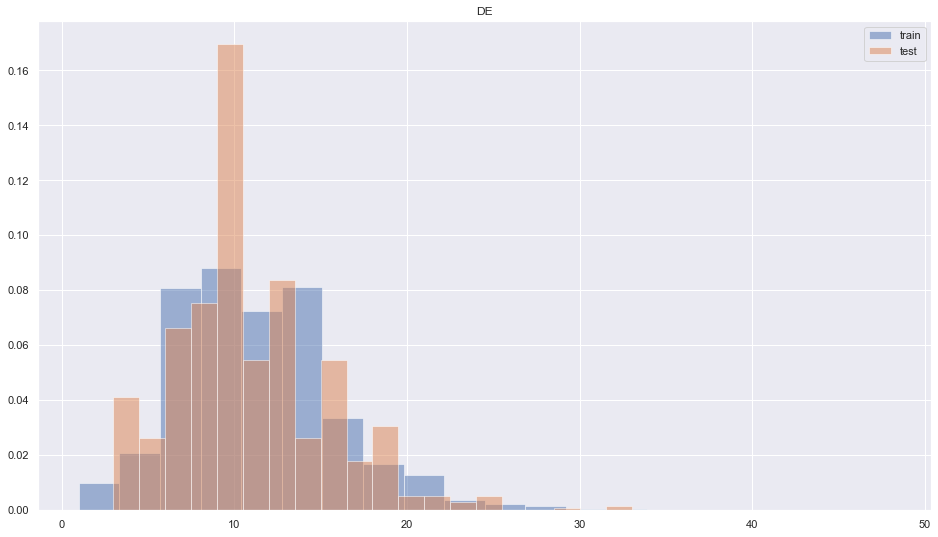

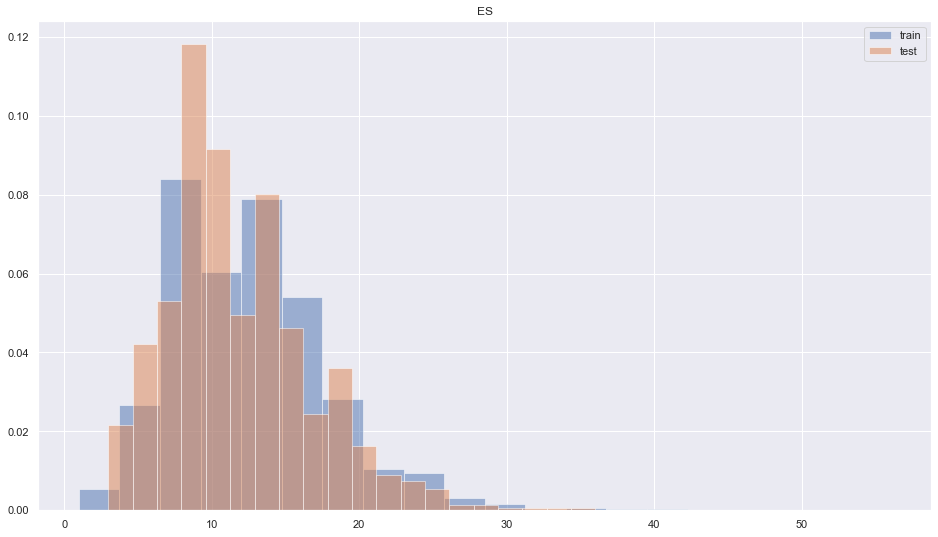

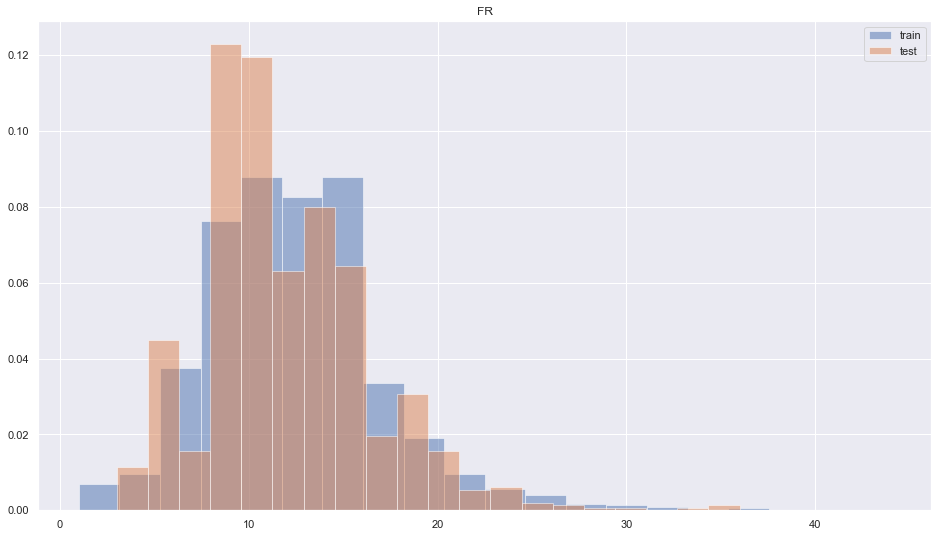

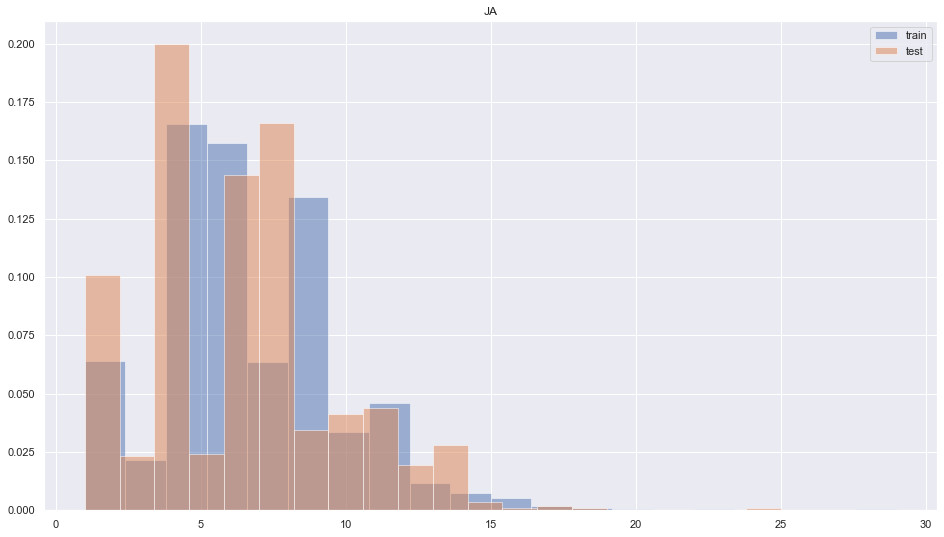

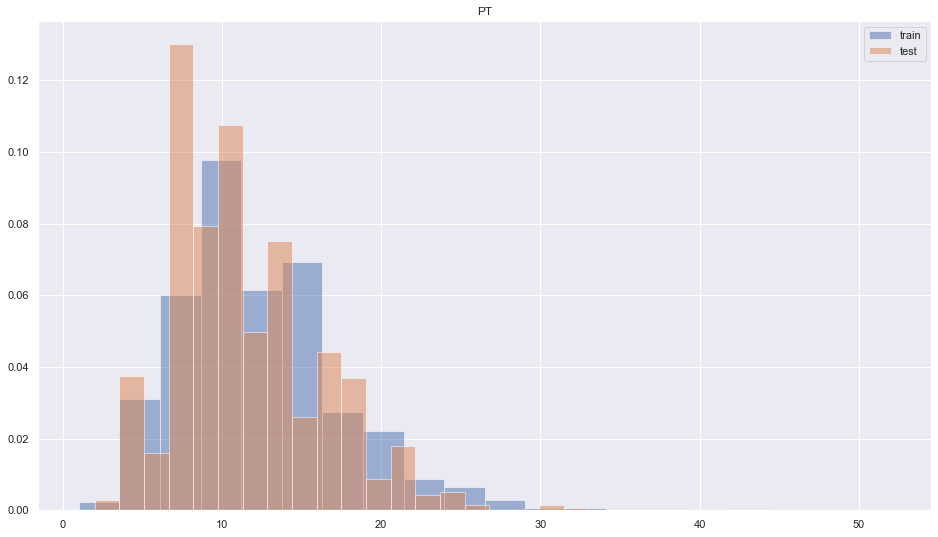

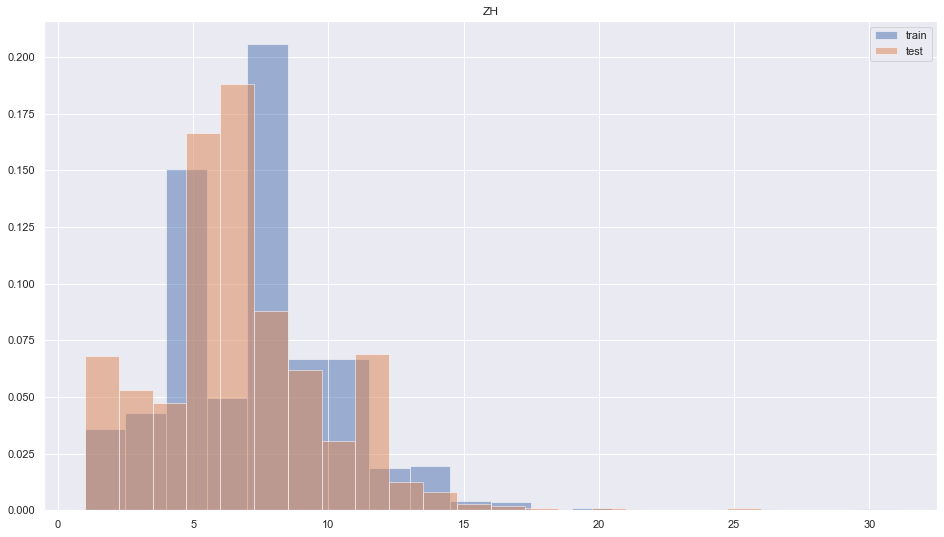

In [2]:
# word count

for language in ['EN', 'DE', 'ES', 'FR', 'JA', 'PT', 'ZH']:
    for subset in ['train', 'test']:
        df = pd.read_csv(f'data/atis/{subset}/{subset}_{language}.tsv', delimiter='\t', index_col='id')
        plt.hist(df['utterance'].str.split().apply(len), density=True, bins=20, alpha=0.5, label=subset)
    plt.title(language)
    plt.legend()
    plt.show()

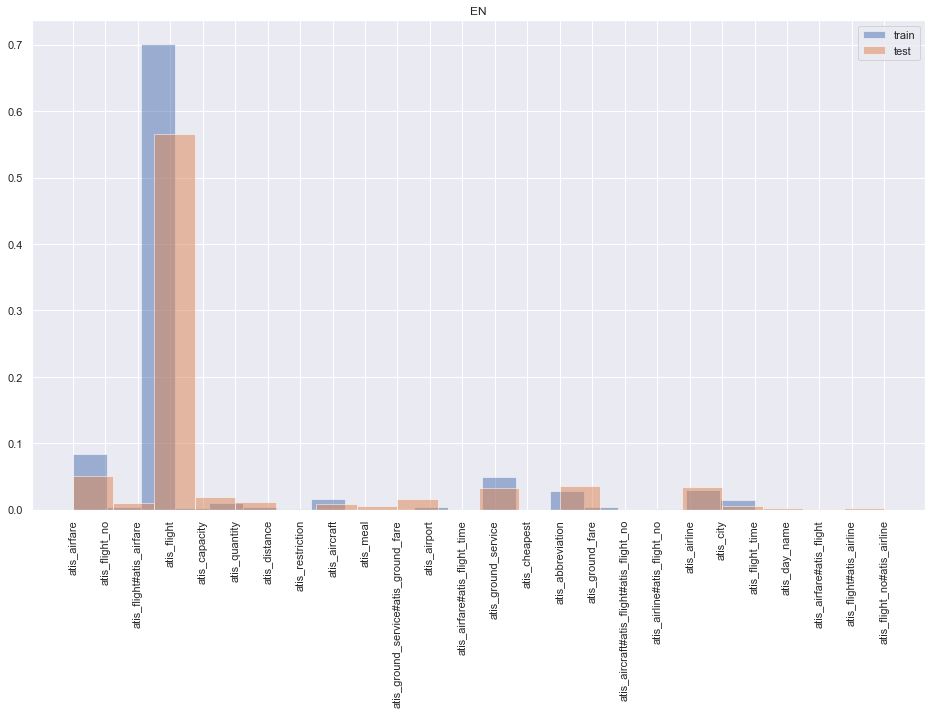

In [3]:
language = 'EN'

for subset in ['train', 'test']:
    df = pd.read_csv(f'data/atis/{subset}/{subset}_{language}.tsv', delimiter='\t', index_col='id')
    plt.hist(df['intent'], density=True, bins=20, alpha=0.5, label=subset)
plt.title(language)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [70]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [77]:
with open('example.out', 'r') as fp1, open('example', 'r') as fp2:
    for line1, line2 in zip(fp1.readlines(), fp2.readlines()):
        alignments = {x.split('-')[0]: x.split('-')[1] for x in line1.split()}
        sentences = list(map(str.strip, line2.split('|||')))
        print(alignments, sentences)

{'18': '17', '4': '3', '5': '4', '14': '13', '19': '18', '1': '3', '11': '11', '7': '7', '15': '14', '12': '12', '21': '20', '22': '22', '8': '8', '16': '15', '0': '0', '9': '9', '17': '16', '10': '10', '6': '6'} ['i can refer him to no better authority on the subject than the hon. member for Don Valley , not just myself .', 'il ne y a pas de meilleure autorité en la matière que le député de Don Valley , non pas moi exclusivement .']
{'2': '4', '0': '0', '1': '1', '4': '6', '3': '5'} ['it is quite understandable .', 'ce est tout à fait compréhensible .']
